**Vanishing Gradient**


In [4]:
#Create Dataset

import torch
from torch.utils.data import DataLoader, TensorDataset

n_samples = 300
seq_len = 200
features = 1

# First number determines label, rest are noise
X = torch.rand(n_samples, seq_len, features)
y = (X[:, 0, 0] > 0.5).float()  # label based only on first element

dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=16, shuffle=True)


#Define a simple RNN (same as before)
import torch.nn as nn
import torch.optim as optim

class SimpleRNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.rnn = nn.RNN(1, 8, batch_first=True)
        self.fc = nn.Sequential(
            nn.Linear(8, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        out, _ = self.rnn(x)
        last_output = out[:, -1, :]  # only the final step output
        return self.fc(last_output)

#Train and evaluate
model = SimpleRNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(10):
    total_loss = 0
    for batch_x, batch_y in loader:
        optimizer.zero_grad()
        preds = model(batch_x)
        batch_y = batch_y.view(-1, 1)
        loss = criterion(preds, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1} | Loss: {total_loss/len(loader):.4f}")

    #Check accuracy
    model.eval()
with torch.no_grad():
    preds = model(X).squeeze()
pred_labels = (preds > 0.5).float()
acc = (pred_labels == y).float().mean().item()
print(f"Accuracy: {acc*100:.2f}%")




Epoch 1 | Loss: 0.7002
Epoch 2 | Loss: 0.6926
Epoch 3 | Loss: 0.6917
Epoch 4 | Loss: 0.6902
Epoch 5 | Loss: 0.6892
Epoch 6 | Loss: 0.6905
Epoch 7 | Loss: 0.6943
Epoch 8 | Loss: 0.6935
Epoch 9 | Loss: 0.6910
Epoch 10 | Loss: 0.6905
Accuracy: 56.00%


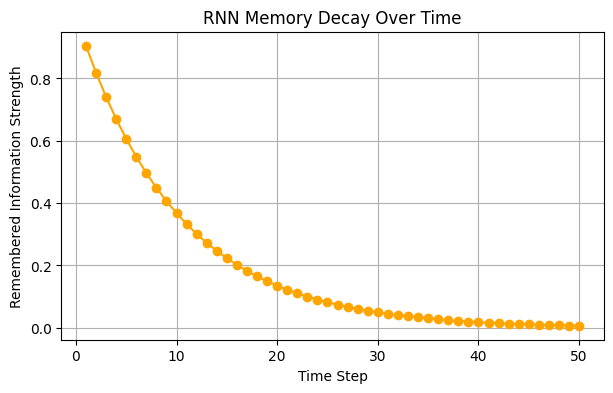

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate "memory strength" fading over time
time_steps = np.arange(1, 51)
memory_strength = np.exp(-0.1 * time_steps)  # exponential decay

plt.figure(figsize=(7,4))
plt.plot(time_steps, memory_strength, marker='o', color='orange')
plt.title("RNN Memory Decay Over Time")
plt.xlabel("Time Step")
plt.ylabel("Remembered Information Strength")
plt.grid(True)
plt.show()


In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

n_samples = 200
seq_len = 50
features = 1

X = torch.rand(n_samples, seq_len, features)
y = (X.sum(dim=1) > 75).float()

dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

class ExplodingRNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.rnn = nn.RNN(1, 64, batch_first=True, nonlinearity='relu')
        self.fc = nn.Linear(64, 1)  # no sigmoid
    def forward(self, x):
        out, _ = self.rnn(x)
        return self.fc(out[:, -1, :])  # raw logits

criterion = nn.BCEWithLogitsLoss()

# Force recurrent weights to large values
for name, param in model.named_parameters():
    if "weight_hh" in name:
        with torch.no_grad():
            param.mul_(5.0)

# --- Train ---
for epoch in range(5):
    total_loss = 0
    for batch_x, batch_y in loader:
        optimizer.zero_grad()
        preds = model(batch_x)
        batch_y = batch_y.view(-1, 1)
        loss = criterion(preds, batch_y)
        loss.backward()

        total_grad = 0
        for p in model.parameters():
            if p.grad is not None:
                total_grad += p.grad.abs().mean().item()
        print(f"Epoch {epoch+1} | Avg Grad: {total_grad:.2e}")

        optimizer.step()
        total_loss += loss.item()



Epoch 1 | Avg Grad: nan
Epoch 1 | Avg Grad: nan
Epoch 1 | Avg Grad: nan
Epoch 1 | Avg Grad: nan
Epoch 1 | Avg Grad: nan
Epoch 1 | Avg Grad: nan
Epoch 1 | Avg Grad: nan
Epoch 1 | Avg Grad: nan
Epoch 1 | Avg Grad: nan
Epoch 1 | Avg Grad: nan
Epoch 1 | Avg Grad: nan
Epoch 1 | Avg Grad: nan
Epoch 1 | Avg Grad: nan
Epoch 2 | Avg Grad: nan
Epoch 2 | Avg Grad: nan
Epoch 2 | Avg Grad: nan
Epoch 2 | Avg Grad: nan
Epoch 2 | Avg Grad: nan
Epoch 2 | Avg Grad: nan
Epoch 2 | Avg Grad: nan
Epoch 2 | Avg Grad: nan
Epoch 2 | Avg Grad: nan
Epoch 2 | Avg Grad: nan
Epoch 2 | Avg Grad: nan
Epoch 2 | Avg Grad: nan
Epoch 2 | Avg Grad: nan
Epoch 3 | Avg Grad: nan
Epoch 3 | Avg Grad: nan
Epoch 3 | Avg Grad: nan
Epoch 3 | Avg Grad: nan
Epoch 3 | Avg Grad: nan
Epoch 3 | Avg Grad: nan
Epoch 3 | Avg Grad: nan
Epoch 3 | Avg Grad: nan
Epoch 3 | Avg Grad: nan
Epoch 3 | Avg Grad: nan
Epoch 3 | Avg Grad: nan
Epoch 3 | Avg Grad: nan
Epoch 3 | Avg Grad: nan
Epoch 4 | Avg Grad: nan
Epoch 4 | Avg Grad: nan
Epoch 4 | Avg Gr

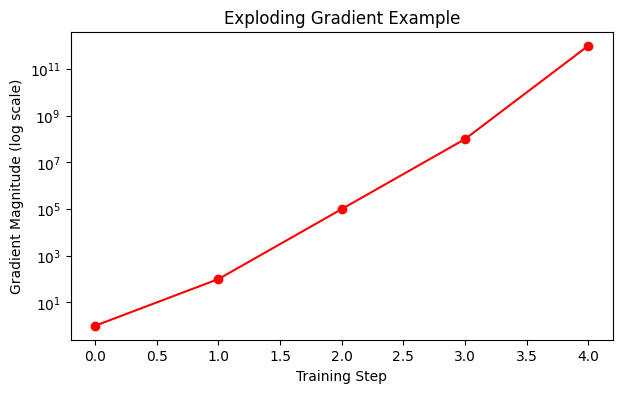

In [29]:
grad_values = [1e0, 1e2, 1e5, 1e8, 1e12]
plt.figure(figsize=(7,4))
plt.plot(grad_values, marker='o', color='red')
plt.yscale('log')
plt.title("Exploding Gradient Example")
plt.xlabel("Training Step")
plt.ylabel("Gradient Magnitude (log scale)")
plt.show()
